<p style="font-family: Times New Roman;font-size:22px;color:orangered"><b>1. Introduction</b></p>

<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>1.1. Import the necessary libraries.</b></p>

In [1]:
# For network analysis
import networkx as nx
import community

# For plotting graphs
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# For importing files, handling dataframes and functions
import pandas as pd
import numpy as np
import math
import random

<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>1.2. Load and quickly inspect the two files.</b></p>

In [3]:
# Load the node file into a pandas DataFrame
nodes_df = pd.read_csv("nodes_cluster_G.csv", delimiter=';', header=0)

# Load the edge file into a pandas DataFrame
edges_df = pd.read_csv('edges_cluster_G.csv', delimiter=';', header=0)

#Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
for _, row in nodes_df.iterrows():
    G.add_node(row['id'], coord=row['coord'], core=row['core'], gender=row['gender'])

# Add edges to the graph
for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], pre_link=row['pre_link'], post_link=row['post_link'])

# Print graph summary
print('Graph with', G.number_of_nodes(), 'nodes and', G.number_of_edges(), 'edges.')

Graph with 381 nodes and 2098 edges.


<p style="font-family: Times New Roman;font-size:22px;color:orangered"><b>3. Separated time periods</b></p>

<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>3.1. Time analysis: pre and post treatment.</b></p>

In [19]:
# Select source, target, pre_link
edges_df_PRE = edges_df.iloc[:, :3]
# Select source, target, post_link
edges_df_POST = edges_df.iloc[:, [0, 1, 3]]

#Create NetworkX graphs
PRE = nx.Graph()
POST = nx.Graph()

# Add nodes to the graphs
for _, row in nodes_df.iterrows():
    PRE.add_node(row['id'], coord=row['coord'], core=row['core'], gender=row['gender'])
for _, row in nodes_df.iterrows():
    POST.add_node(row['id'], coord=row['coord'], core=row['core'], gender=row['gender'])

# Add edges to the graph where pre_link=1
for _, row in edges_df_PRE[edges_df_PRE['pre_link'] == 1].iterrows():
    PRE.add_edge(row['source'], row['target'], pre_link=row['pre_link'])
# Add edges to the graph where post_link=1
for _, row in edges_df_POST[edges_df_POST['post_link'] == 1].iterrows():
    POST.add_edge(row['source'], row['target'], post_link=row['post_link'])

# Print graph summary
print('Graph PRE with', PRE.number_of_nodes(), 'nodes and', PRE.number_of_edges(), 'edges.')
# Check if the graph is connected or disconnected
print("Is the graph connected?", nx.is_connected(PRE))
# Print graph summary
print('Graph POST with', POST.number_of_nodes(), 'nodes and', POST.number_of_edges(), 'edges.')
# Check if the graph is connected or disconnected
print("Is the graph connected?", nx.is_connected(POST))

Graph PRE with 381 nodes and 1251 edges.
Is the graph connected? False
Graph POST with 381 nodes and 1440 edges.
Is the graph connected? False


<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>3.2. Pre treatment.</b></p>

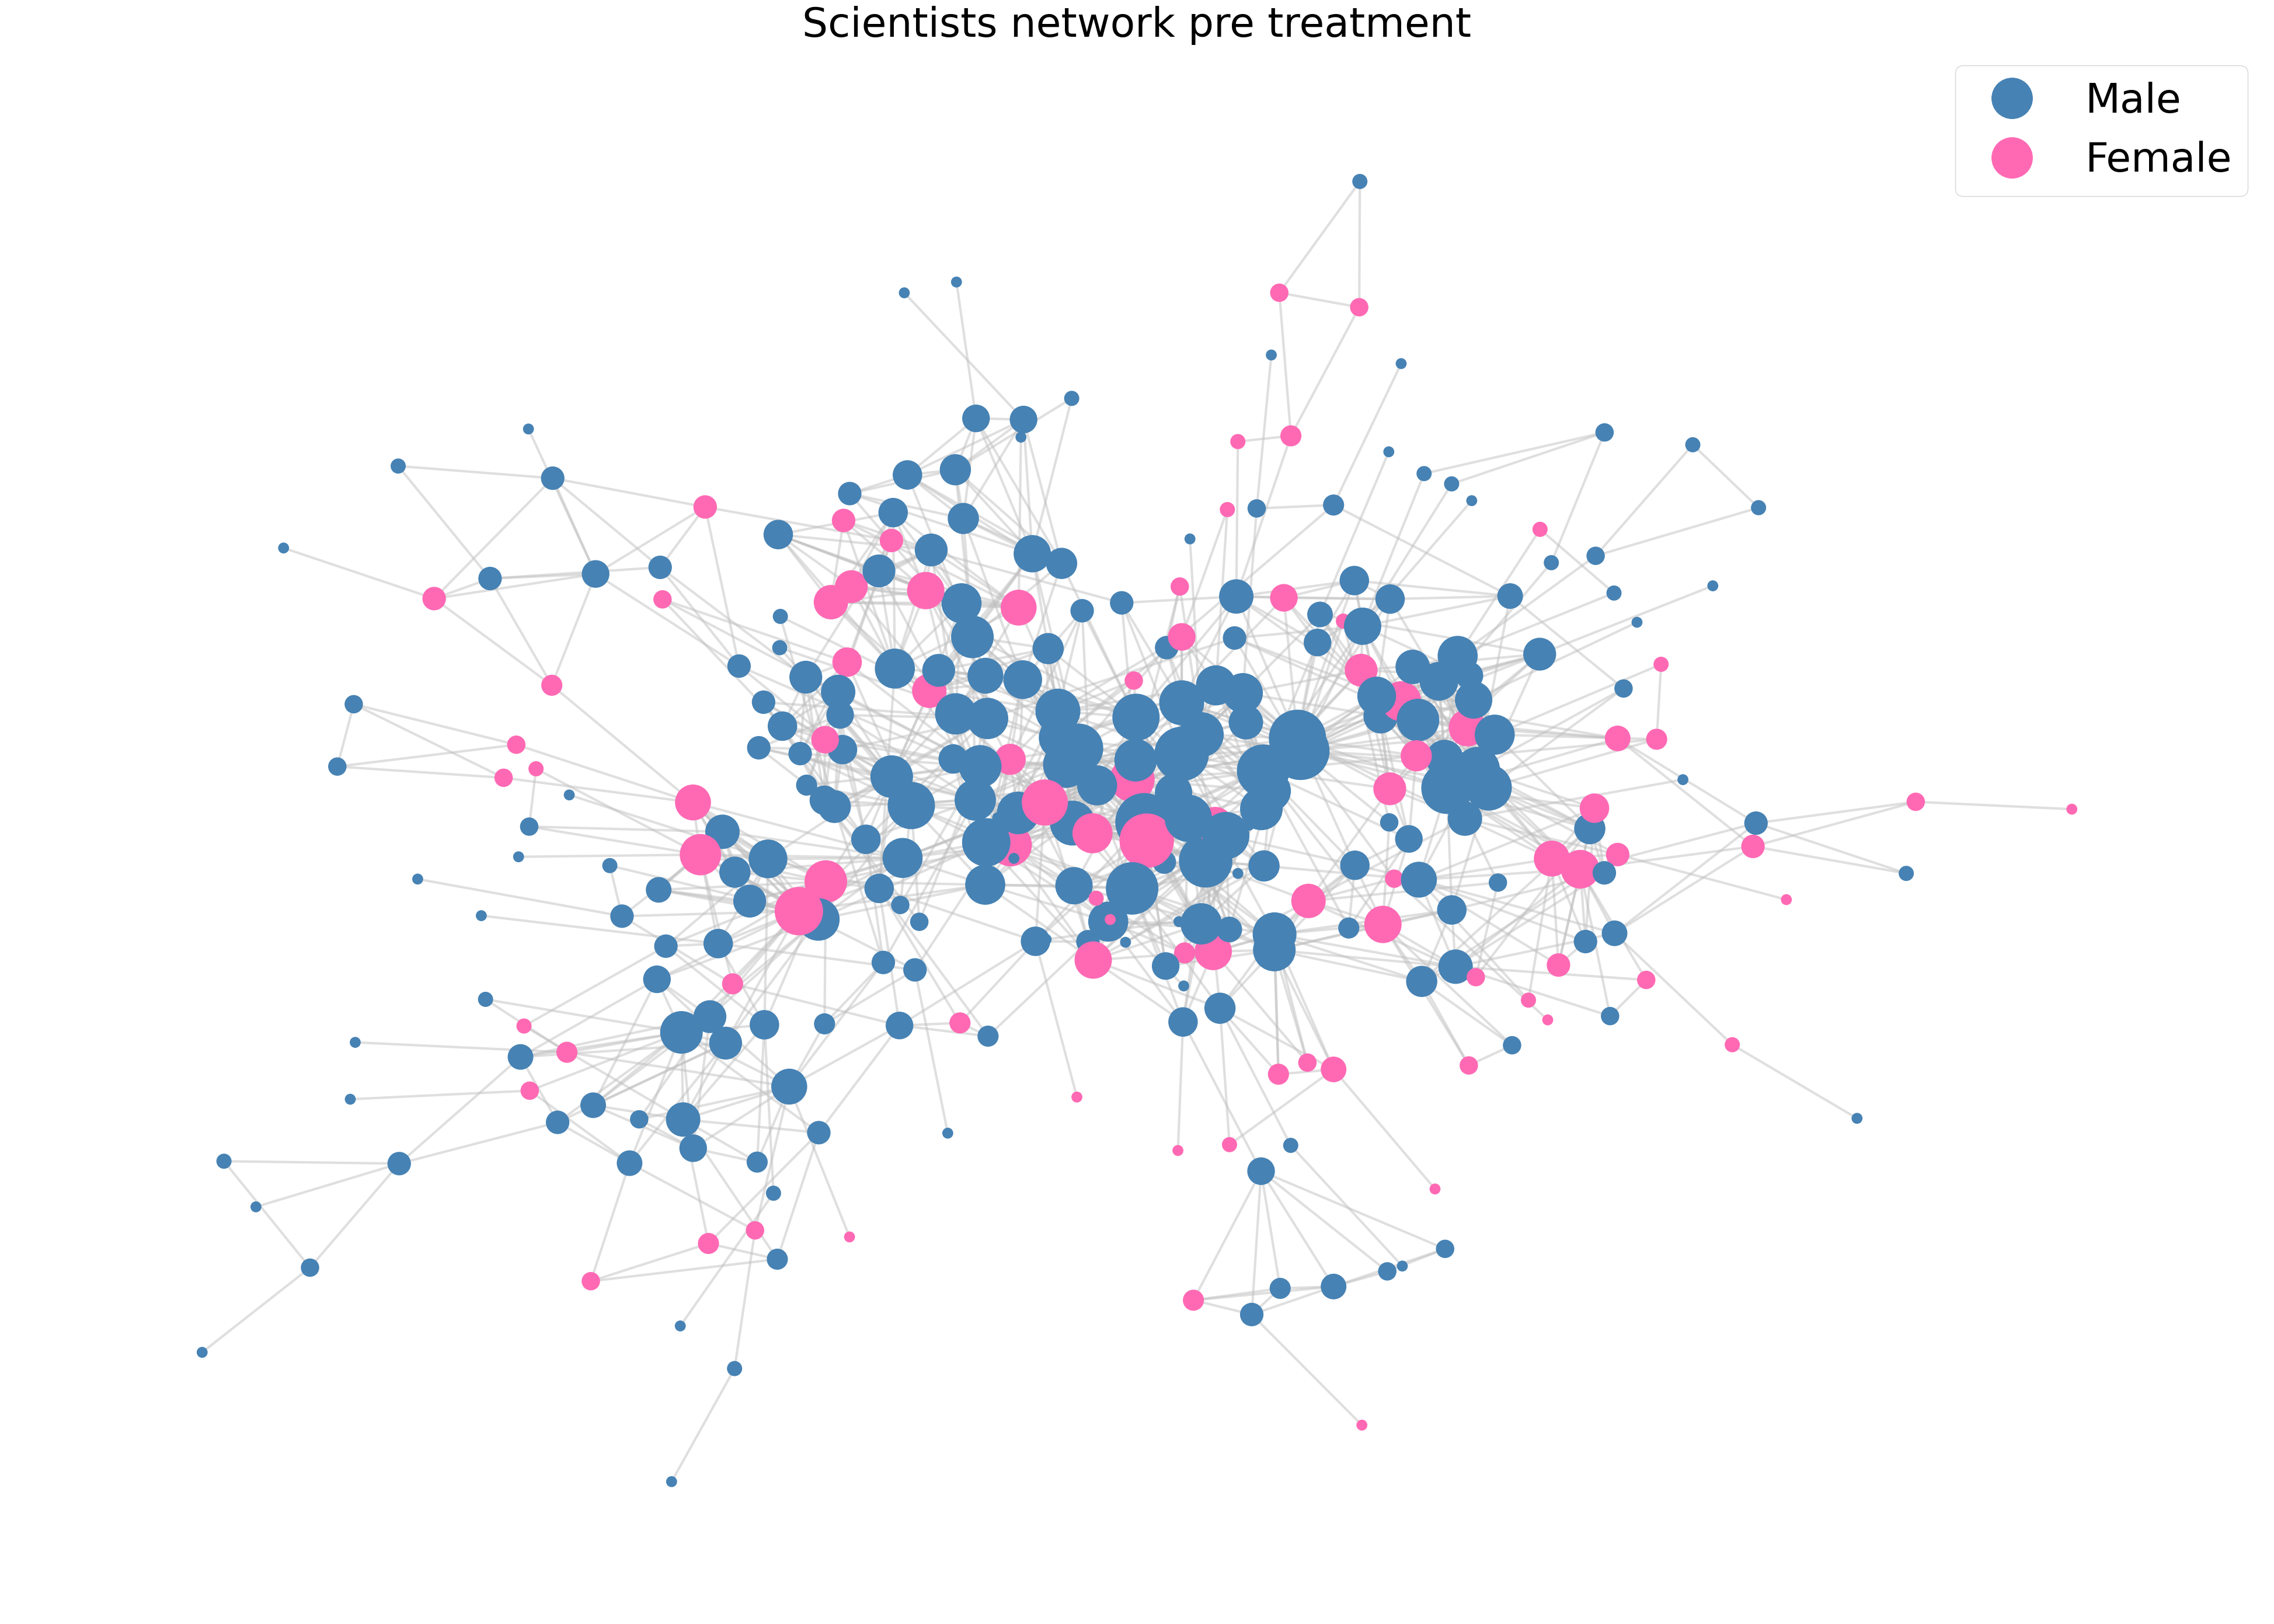

In [20]:
# Choose layout
pos = nx.kamada_kawai_layout(PRE)

# Define the colors for each gender
gender_colors = {0: 'steelblue', 1: 'hotpink'}

# Define a node color mapping dictionary based on the 'gender' attribute
node_color_map = {str(node_id): gender_colors[attr['gender']] for node_id, attr in PRE.nodes(data=True)}

# Get the degree list 
degrees = [d for n,d in PRE.degree()]
degree_min = min(degrees)
degree_max = max(degrees)
degrees = [(d-degree_min)/(degree_max - degree_min)*5000 for d in degrees]

# Draw the nodes, sized to their degree 
nx.draw_networkx_nodes(PRE, pos, node_size=[v for v in degrees],
                       node_color=[node_color_map.get(str(n)) for n in PRE.nodes()])

# Draw the edges
nx.draw_networkx_edges(PRE, pos, edge_color='silver', width=3.0, alpha=0.5)

# Add legend
legend_handles = [plt.plot([], [], marker='o', markersize=50, color=color, ls="")[0] for gender, color in gender_colors.items()]
plt.legend(handles=legend_handles, labels=['Male', 'Female'], loc='upper right', fontsize=50)

plt.rcParams['figure.figsize'] = [50, 35]

# Set the axis to be off
plt.axis('off')
plt.title('Scientists network pre treatment', fontsize=50)
plt.show()

#plt.savefig('figures/scientists_network_pre.png',format='png')

<p style="font-family: Times New Roman;font-size:18px;color:navy"><b>3.2.3. Cluster coordinator PRE.</b></p>

In [29]:
# Find nodes with attribute coord=1
node_coord_PRE = [n for n, attrs in PRE.nodes(data=True) if attrs['coord'] == 1]
print('The cluster coordinator is node',node_coord_PRE)

# Change the color of coordinator node
nx.set_node_attributes(PRE, {7440: 'darkorange'}, name='color')

# Find coordinator node' gender
if PRE.nodes[7440]['gender'] == 0:
    print('The cluster coordinator is male.')
else:
    print('The cluster coordinator is female.')

neighbors_7440_PRE = list(PRE.neighbors(7440))
print("Neighbors of node 7440:", neighbors_7440_PRE)

# Create a subgraph with node 7440 and its neighbors
CD_PRE = PRE.subgraph([7440] + neighbors_7440_PRE)

# Check if the graph is connected or disconnected
print("Is the graph connected?", nx.is_connected(CD_PRE))

The cluster coordinator is node [7440]
The cluster coordinator is male.
Neighbors of node 7440: [2682, 7431, 7444, 7442, 36875, 73243, 85068, 54368, 36856, 36853, 7447, 61474, 12937, 36854, 36886, 36885, 82797, 60719, 8295, 7452]
Is the graph connected? True


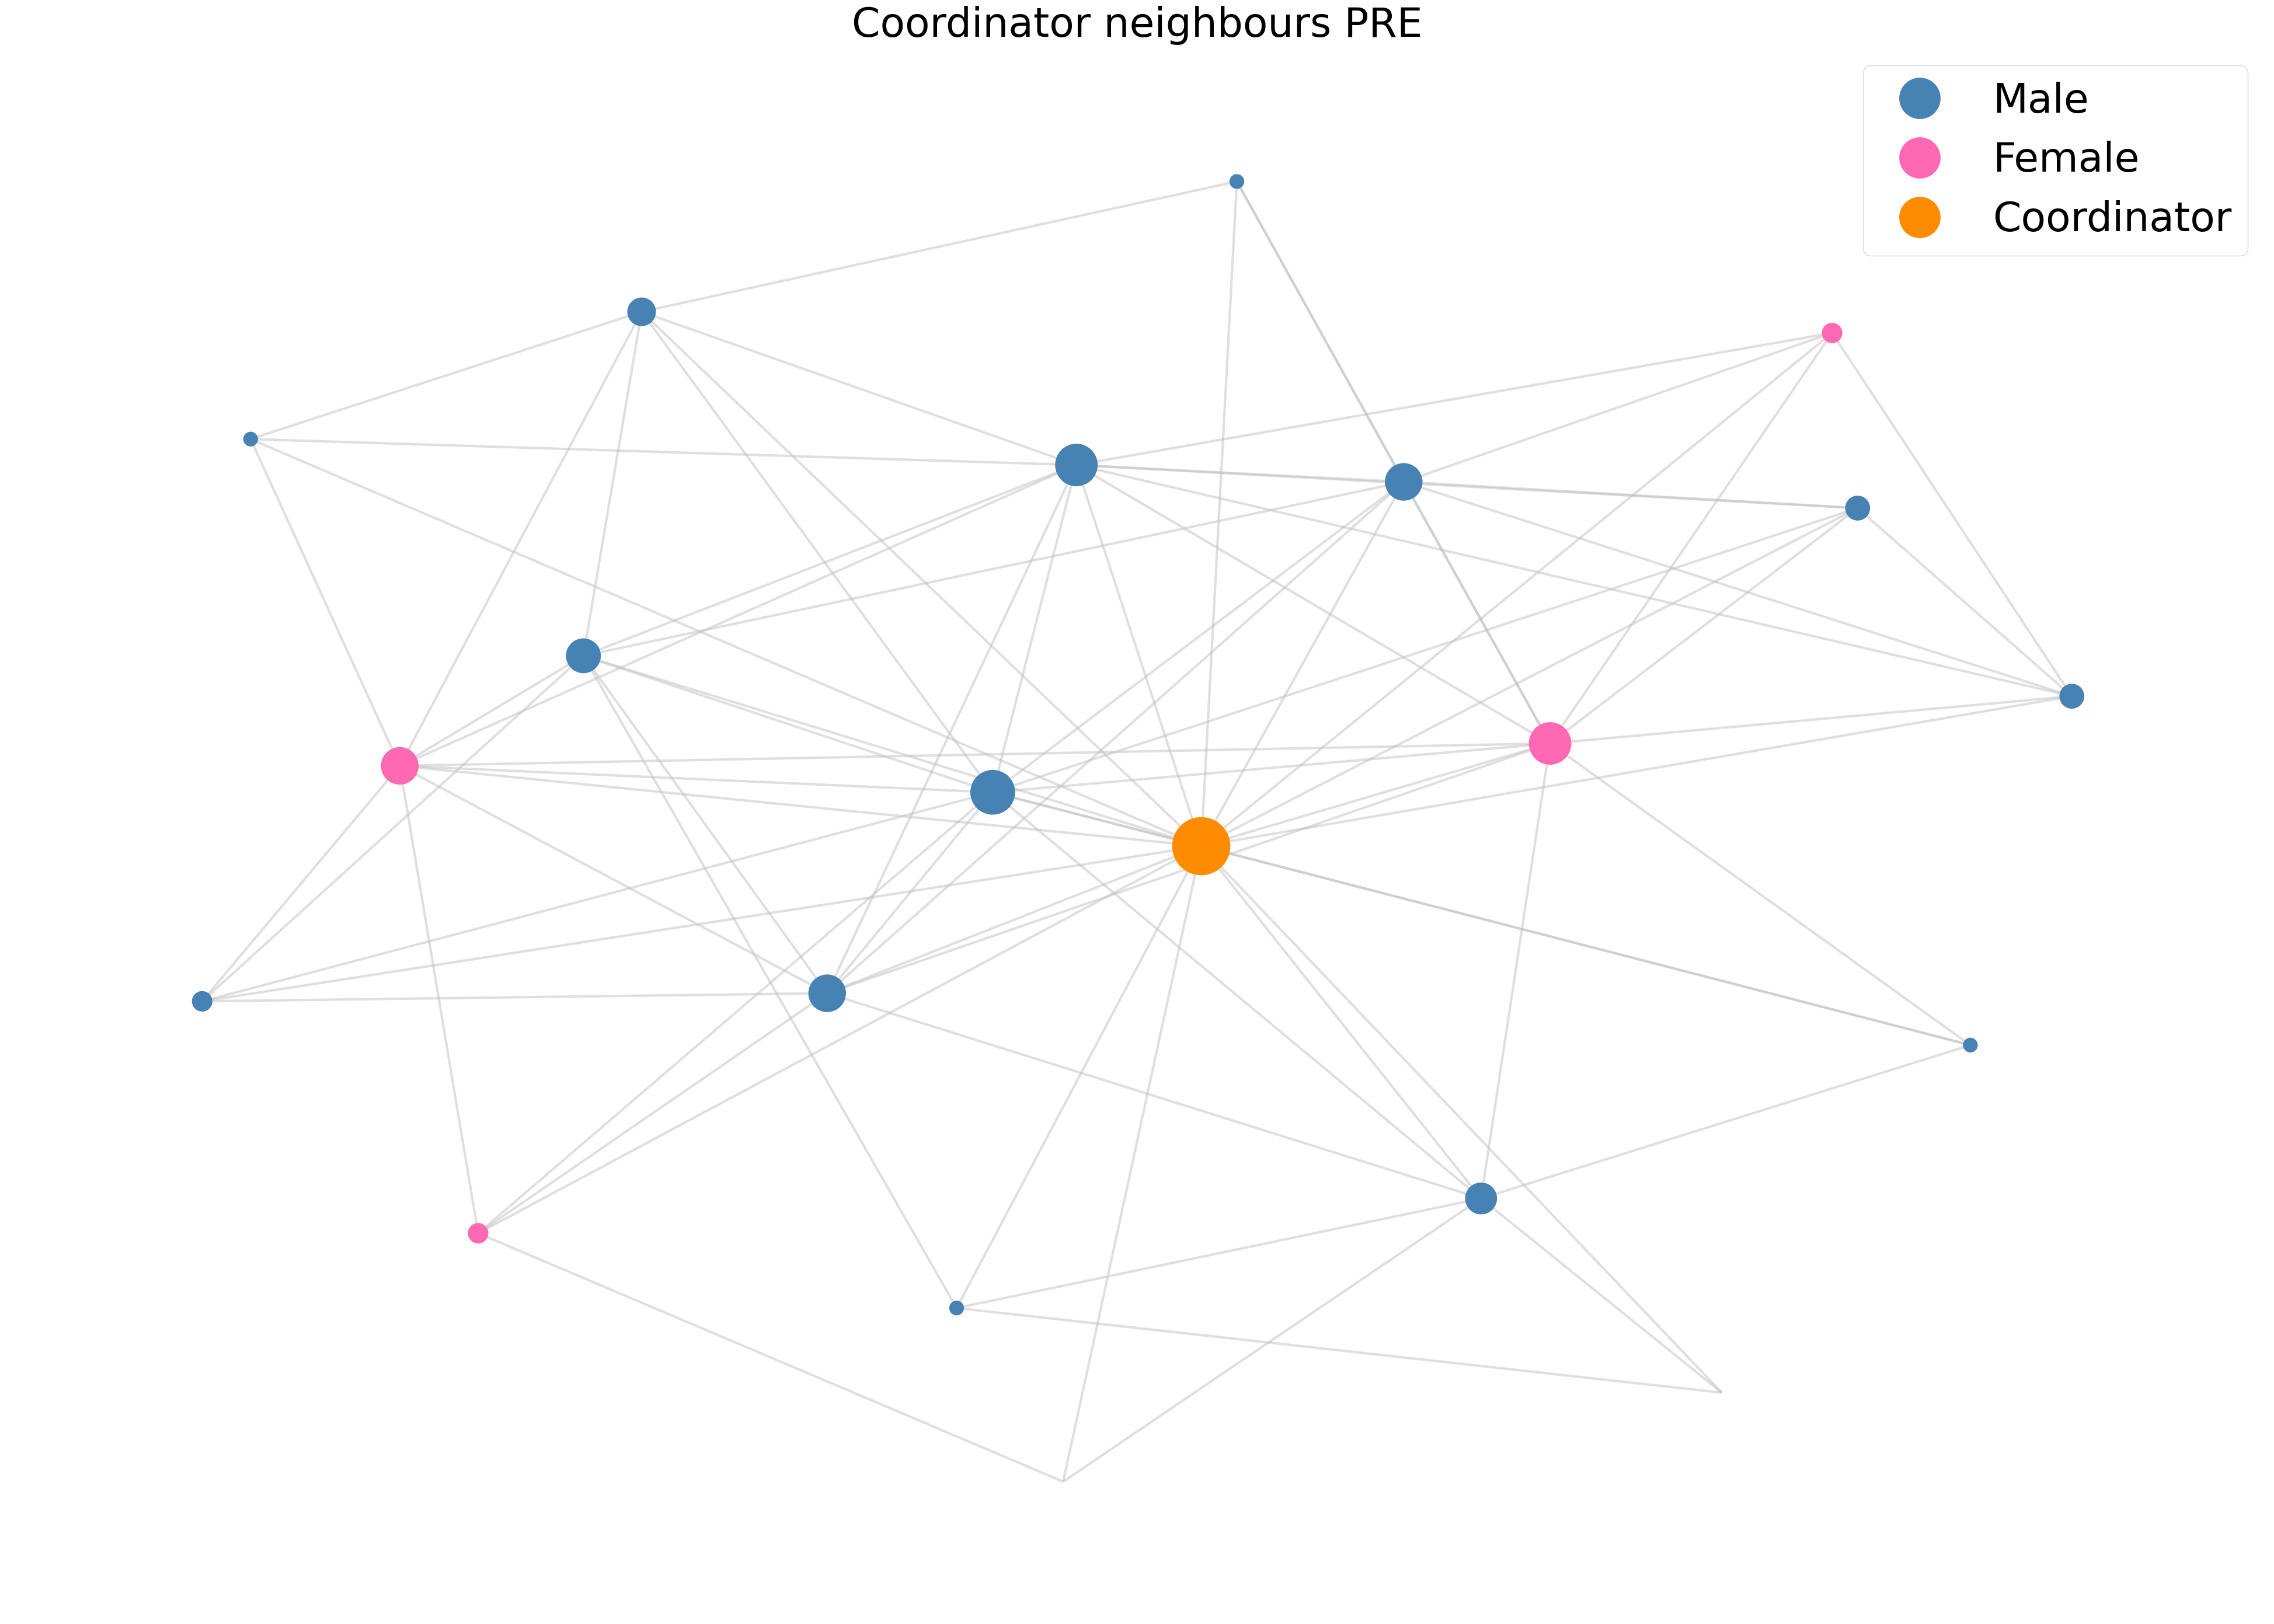

In [30]:
#Create a temporary gender value, for color mapping purposes
PRE.nodes[7440]['gender'] = 2

# Choose layout
pos = nx.kamada_kawai_layout(CD_PRE)

# Define the colors for each gender
gender_colors = {0: 'steelblue', 1: 'hotpink', 2:'darkorange'}

# Define a node color mapping dictionary based on the 'gender' attribute
node_color_map = {str(node_id): gender_colors[attr['gender']] for node_id, attr in PRE.nodes(data=True)}

# Get the degree list 
degrees = [d for n,d in CD_PRE.degree()]
degree_min = min(degrees)
degree_max = max(degrees)
degrees = [(d-degree_min)/(degree_max - degree_min)*5000 for d in degrees]

# Draw the nodes, sized to their degree 
nx.draw_networkx_nodes(CD_PRE, pos, node_size=[v for v in degrees],
                      node_color=[node_color_map.get(str(n)) for n in CD_PRE.nodes()])

# Draw the edges
nx.draw_networkx_edges(CD_PRE, pos, edge_color='silver', width=3.0, alpha=0.5)

# Add legend
legend_handles = [plt.plot([], [], marker='o', markersize=50, color=color, ls="")[0] for gender, color in gender_colors.items()]
plt.legend(handles=legend_handles, labels=['Male', 'Female', 'Coordinator'], loc='upper right', fontsize=50)

plt.rcParams['figure.figsize'] = [50, 35]

# Set the axis to be off
plt.axis('off')
plt.title('Coordinator neighbours PRE', fontsize=50)
plt.show()
#plt.savefig('coordinator_pre.png')

# Restore node 7440 manhood
PRE.nodes[7440]['gender'] = 0

<p style="font-family: Times New Roman;font-size:16px;color:navy"><b>3.2.3.1. Centrality measures for coordinator node PRE.</b></p>

In [31]:
print(f"Degree of cluster coordinator: {PRE.degree(7440)}.")
print("Clustering coefficient of cluster coordinator:", nx.clustering(PRE, 7440))

Degree of cluster coordinator: 20.
Clustering coefficient of cluster coordinator: 0.3157894736842105


In [32]:
closeness_centrality_PRE = nx.closeness_centrality(PRE)
closeness_centrality_7440_PRE = closeness_centrality_PRE[7440]
print("Closeness centrality of the coordinator PRE:", closeness_centrality_7440_PRE)

eigenvector_centrality_PRE = nx.eigenvector_centrality(PRE)
eigenvector_centrality_7440_PRE = eigenvector_centrality_PRE[7440]
print("Eigenvector centrality of the coordinator PRE:", eigenvector_centrality_7440_PRE)

betweenness_centrality_PRE = nx.betweenness_centrality(PRE)
betweenness_centrality_7440_PRE = betweenness_centrality_PRE[7440]
print("Betweenness centrality of the coordinator PRE:", betweenness_centrality_7440_PRE)

Closeness centrality of the coordinator PRE: 0.25439330543933053
Eigenvector centrality of the coordinator PRE: 0.1443175663103226
Betweenness centrality of the coordinator PRE: 0.016138404913978336


<p style="font-family: Times New Roman;font-size:16px;color:navy"><b>3.2.3.2. Gender distribution into coordinator cluster PRE.</b></p>

In [33]:
num_male_coord_ditrib_PRE = 0
num_female_coord_ditrib_PRE = 0

for node_id, node_attr in CD_PRE.nodes(data=True):
    if node_attr['gender'] == 0:
        num_male_coord_ditrib_PRE += 1
    elif node_attr['gender'] == 1:
        num_female_coord_ditrib_PRE += 1

print("Number of male nodes PRE:", num_male_coord_ditrib_PRE)
print("Number of female nodes PRE:", num_female_coord_ditrib_PRE)

Number of male nodes PRE: 17
Number of female nodes PRE: 4


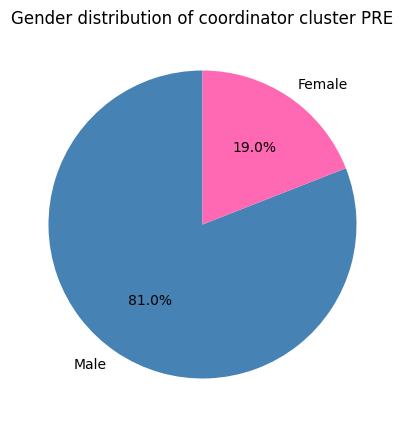

In [34]:
# Define the data
labels_coord_ditrib = ['Male', 'Female']
sizes_coord_distrib_PRE = [num_male_coord_ditrib_PRE, num_female_coord_ditrib_PRE]
colors_coord_distrib = ['steelblue', 'hotpink']

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 5))
plt.pie(sizes_coord_distrib_PRE, labels=labels_coord_ditrib, colors=colors_coord_distrib, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Gender distribution of coordinator cluster PRE')

# Display the chart
plt.show()

<p style="font-family: Times New Roman;font-size:20px;color:navy"><b>3.3. Post treatment.</b></p>